<h1>Machine Learning - Laboratory 1</h1>

<p><b>Note</b> - Run All scripts before<p>

<h3>Exc. 1 - Importing and displaying data</h3>



In [1]:
import pandas as pd
from sklearn.datasets import load_iris

#wczytywanie danych
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

#wyświetlenie wierszy
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


<h4>Data analysys</h4>

<p> Generated dataframe contains a table of lengths of different features fo iris flowers displayed in centimeters</p>

<p>Target parameter contains a class that corresponds to a given species of irisis<br>
Specific flower can by identified by its index in given tables, ie.:<p>
Iris with index <code>3</code> has dimentions of: 
<code style=" white-space: pre-wrap;">  
    sepal length (cm): 4.6,
    sepal width (cm): 3.1,
    petal length (cm): 1.5,
    petal width (cm): 0.2 
</code>
And a target class of <code>0</code> which corresponds to <code>setosa</code> species.
</p>

<h3>Exc. 2 -  Data cleanup</h3>

In [2]:
# Search for missing data

missing_data = df.isnull().sum()
print("Missing data")
print(missing_data)

# Delete rows with missing data
df_cleaned = df.dropna()

Missing data
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


<h4>Result analysis</h4>

<p>This block of code shows that given dataset contains no missing data</p>

<h3>Exc. 3 - Data visualization</h3>

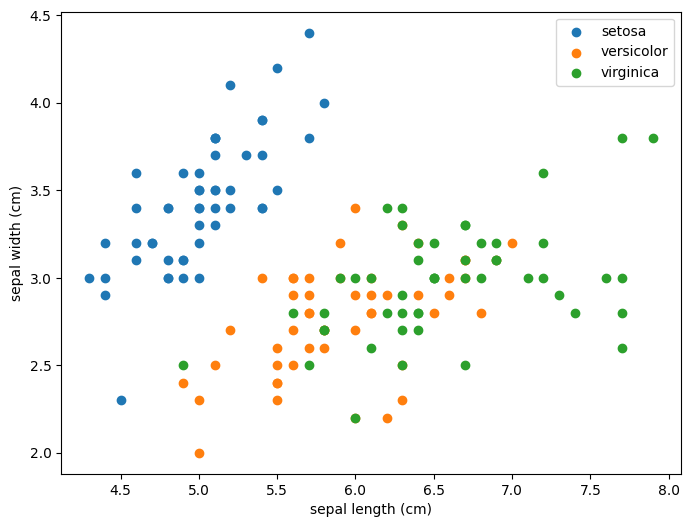

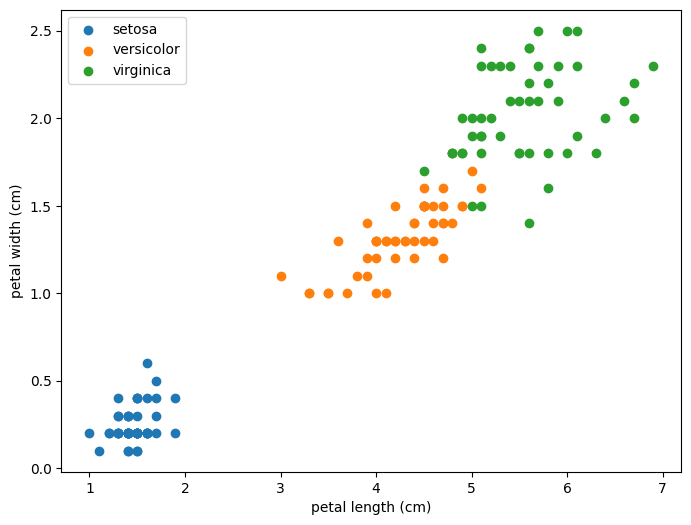

In [3]:
import matplotlib.pyplot as plt

def create_scatter_plot(dataset, target, datax, datay, target_name):
    # Scatter plot
    plt.figure(figsize=(8, 6))

    for species in dataset[target].unique():
        subset = dataset[dataset[target] == species]
        plt.scatter(subset[datax], subset[datay], label = target_name[species])    

    plt.xlabel(datax)
    plt.ylabel(datay)
    plt.legend()
    plt.show()

create_scatter_plot(df_cleaned, 'target', 'sepal length (cm)','sepal width (cm)', iris.target_names)
create_scatter_plot(df_cleaned, 'target', 'petal length (cm)','petal width (cm)', iris.target_names)

<h4>Result analysis</h4>

<p>Scatter plots like ones above can be extremly usefull for categorising data into classes based on relation between specific data points.</p>

<p>For example, from examples shown above we can deduce:
    <ul>
        <li>Scatter plot showing relation between <code>sepal width (cm)</code> and <code>sepal width (cm)</code> can be useful for finding examples of irisies of <code>setrosa</code> species</li>
        <li>but based on this relation it is very hard to differientiate between <code>versicolor</code> and <code>virginica</code> species.</li>
        <li>Second scatter plot, which shows relation between <code>petal length (cm)</code> and <code> petal width (cm)</code>, again shows that <code>setrosa</code> spicies can be very easly identified by this featue,</li>
        <li>but this time we can notice way more distinct separation beetween <code>versicolor</code> and <code>virginica</code> species.</li>
    </ul>
</p>

<p>Conclusons that we can draw are ie.:
    <ul>
        <li><code>setrosa</code> can be easly identified by both relation between <code>petal length (cm)</code> and <code> petal width (cm)</code> and <code>sepal width (cm)</code> and <code>sepal width (cm)</code></li>
        <li>To distinct </li> beetween <code>versicolor</code> and <code>virginica</code> species we <b>have to</b> analiyze relation between <code>petal length (cm)</code> and <code> petal width (cm)</code>
    </ul>
</p>

<h3>Exc. 4 - Class size</h3>

In [4]:
#counting

#counted_data = pd.value_counts(df['target'])
counted_data2 = pd.Series(df['target']).value_counts()
print(counted_data2)

target
0    50
1    50
2    50
Name: count, dtype: int64


<h4>Result analysis</h4>
<p>This piece of code shows that we have equal number of each speices of irises.<p>

<h3>Exc. 5 - Histograms</h3>

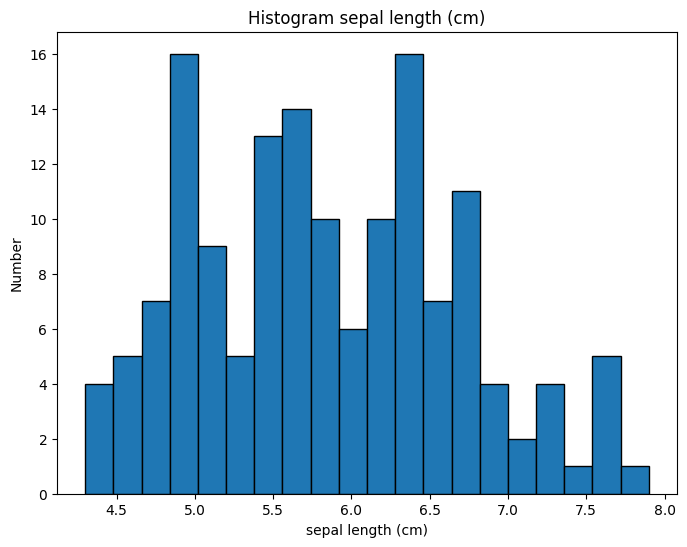

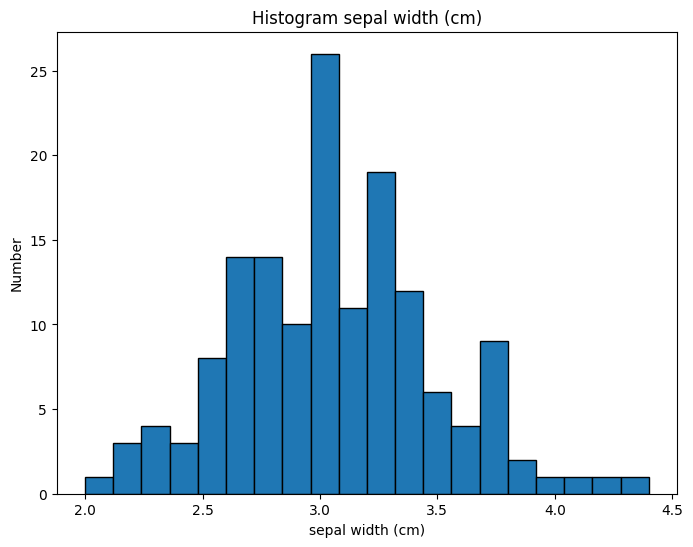

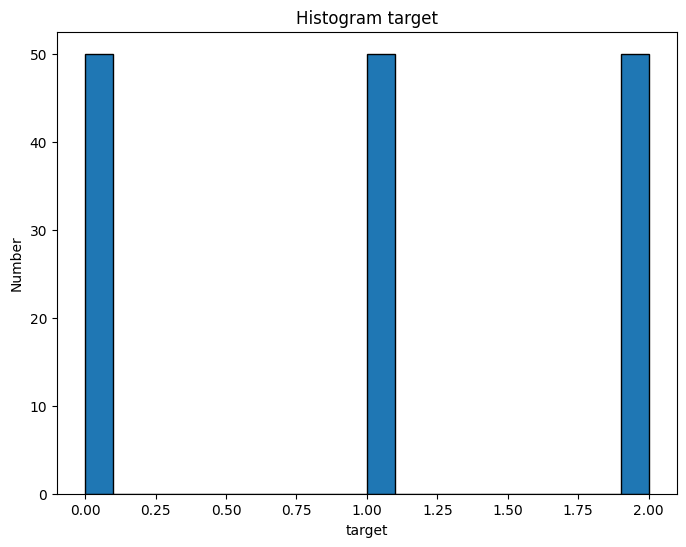

In [5]:
def create_histogram(feature):
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20, edgecolor = 'k')
    plt.xlabel(feature)
    plt.ylabel('Number')
    plt.title(f'Histogram {feature}')
    plt.show()

create_histogram('sepal length (cm)')
create_histogram('sepal width (cm)')
create_histogram('target')

<h4>Results analysis</h4>
<p>Pesult of code above counts total numbers of occurances given value of given data point and shows this distribution and shows its distribution on a bar graph. It allows to quickly identyfy distribution and outliers of given feature.</p>

<p>Last graph shows total number of datapoints for each <code>target</code> class.</p>

<h3>Bonus Exc. - different data set</h3>

<p>Bonus excercise was conducted for randomly generated data set called <code>make_blobs</code>.</p>

<p>This method generates random set of points (coordinates <code>x</code> and <code>y</code>), which are clustered in certain groups called <code>centers</code>.</p>

In [6]:
#Testing on different dataset

from sklearn.datasets import make_blobs
import string

blobs = make_blobs(n_samples=100, centers=5, n_features=2, random_state=0)
blobs_target_names = list(string.ascii_lowercase)

df = pd.DataFrame(blobs[0], columns=['x', 'y'])
df['center'] = blobs[1]

print(df.head())

          x         y  center
0 -1.884102  8.511893       3
1 -1.150478  1.818481       2
2 -1.399992  3.319872       2
3 -1.794907  3.720339       2
4  1.420133  4.637462       0


In [7]:
#blobs data cleanup
missing_data = df.isnull().sum()

print('Missing blobs')
print(missing_data)

df_cleaned = df.dropna()

Missing blobs
x         0
y         0
center    0
dtype: int64


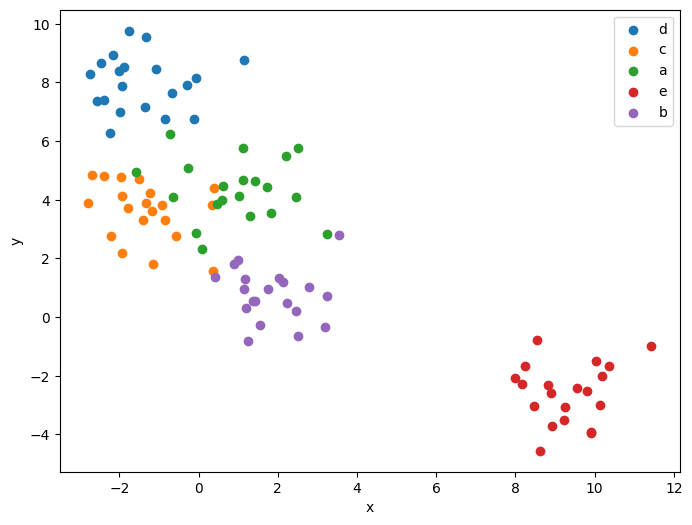

In [8]:
# Scatter plot

create_scatter_plot(df_cleaned, 'center', 'x', 'y', blobs_target_names)

In [9]:
# Count data points

counted_data = pd.Series(df['center']).value_counts()
print(counted_data)

center
3    20
2    20
0    20
4    20
1    20
Name: count, dtype: int64


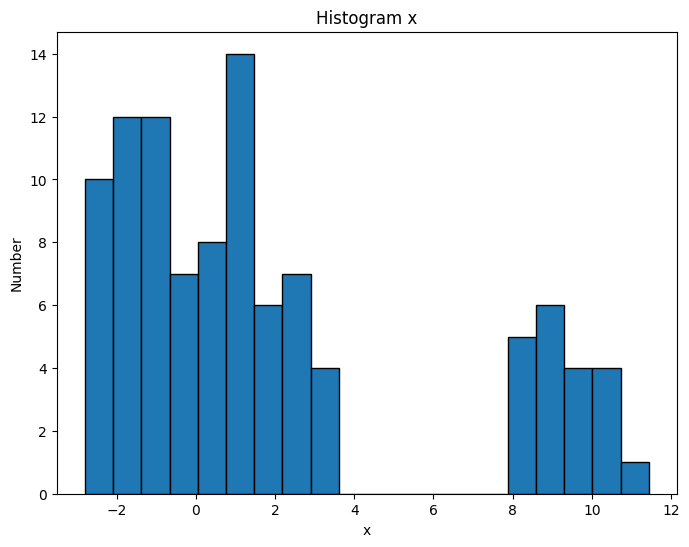

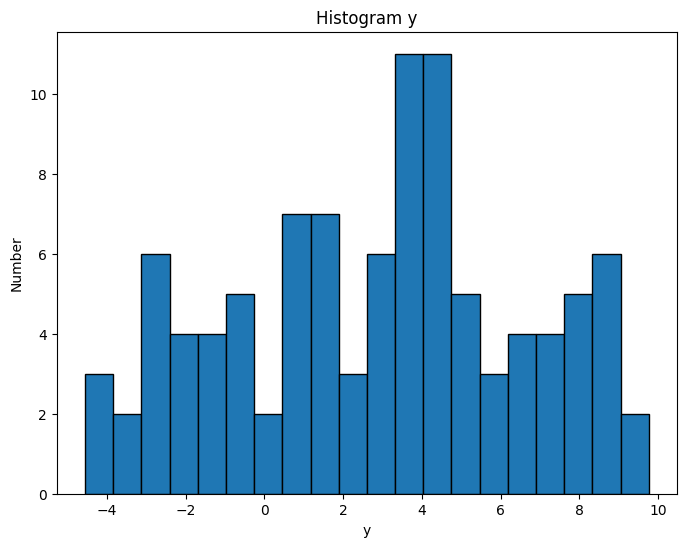

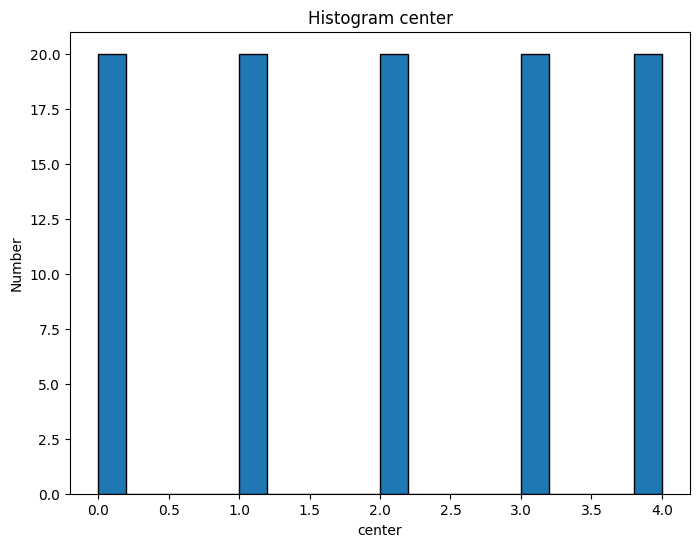

In [10]:
# Create data histograms

create_histogram('x')
create_histogram('y')
create_histogram('center')